# Lesson 5 Exercise

This exercise aims to provide a hands-on understanding of ensemble techniques: bagging, boosting, stacking, and blending. We will explore these techniques using Python's scikit-learn library and visualize their performance on different datasets.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

## Dataset Creation


In [2]:
# Linearly separable dataset
X_linear, y_linear = make_blobs(n_samples=1000, centers=2, random_state=42)

# Linearly separable with outliers
X_linear_outliers, y_linear_outliers = make_blobs(n_samples=1000, centers=2, random_state=42)
outliers = np.random.uniform(low=-6, high=6, size=(100, 2))
X_linear_outliers = np.concatenate([X_linear_outliers, outliers], axis=0)
y_linear_outliers = np.concatenate([y_linear_outliers, np.zeros(100)])

# Nonlinearly separable dataset
X_nonlinear, y_nonlinear = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42)


In [3]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model):
  # Create a meshgrid of points
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = 0.02  # Step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Predict the class for each point in the mesh
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour plot
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Decision Boundary')
  plt.show()


## Question 1: Visualize the three datasets.


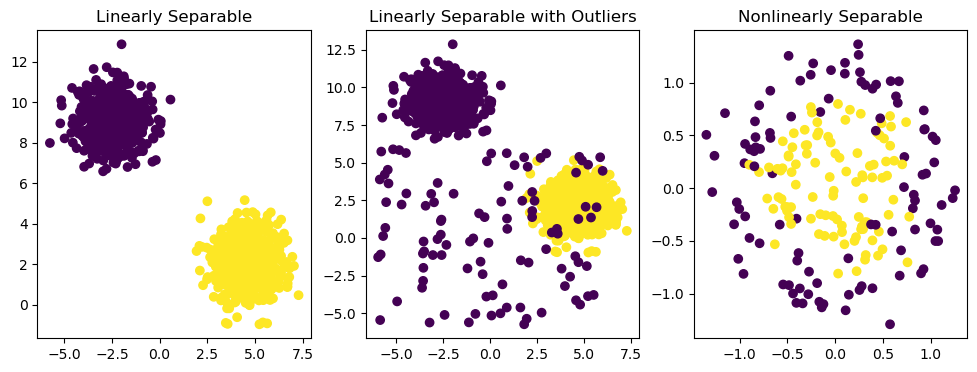

In [4]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear)
plt.title("Linearly Separable")

plt.subplot(132)
plt.scatter(X_linear_outliers[:, 0], X_linear_outliers[:, 1], c=y_linear_outliers)
plt.title("Linearly Separable with Outliers")

plt.subplot(133)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear)
plt.title("Nonlinearly Separable")
plt.show()


## Question 2: Split the data into training and testing sets for each of the above dataset. 
Set random_state=42

In [5]:
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

X_linear_outliers_train, X_linear_outliers_test, y_linear_outliers_train, y_linear_outliers_test = train_test_split(X_linear_outliers, y_linear_outliers, test_size=0.2, random_state=42)

X_nonlinear_train, X_nonlinear_test, y_nonlinear_train, y_nonlinear_test = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)


## Question 3: Create a pipeline for a logistic regression model.
Pipeline consist of StandardScalar for normalization and logistic regression model


In [6]:
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])

## Question 4: Create a pipeline for a decision tree model.
Pipeline consist of StandardScalar for normalization and decision tree model

In [7]:
dt_pipeline = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())])


## Question 5: Create pipelines for bagging, gradient boosting, and AdaBoosting using the decision tree as a base estimator.



In [8]:
bagging_pipeline = Pipeline([('scaler', StandardScaler()), ('clf', BaggingClassifier(estimator=DecisionTreeClassifier()))])
gb_pipeline = Pipeline([('scaler', StandardScaler()), ('clf', GradientBoostingClassifier())])
ada_pipeline = Pipeline([('scaler', StandardScaler()), ('clf', AdaBoostClassifier(estimator=DecisionTreeClassifier(),algorithm='SAMME'))])


## Question 6: Train, evaluate and visualize decision boundary for each model on all three datasets.



In [9]:
def evaluate_models(models,X_train, X_test, y_train, y_test):
  for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.named_steps['clf'].__class__.__name__}: Accuracy = {accuracy:.3f}")
    plot_decision_boundary(X_train, y_train, model)

LogisticRegression: Accuracy = 1.000


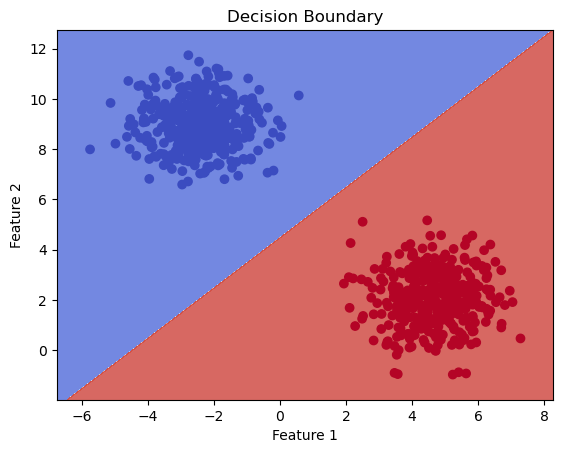

DecisionTreeClassifier: Accuracy = 1.000


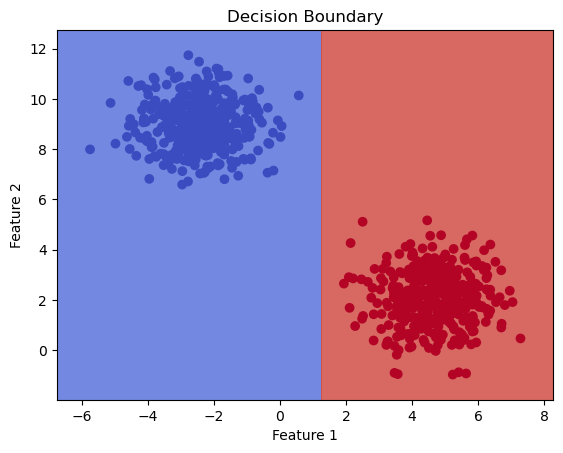

BaggingClassifier: Accuracy = 1.000


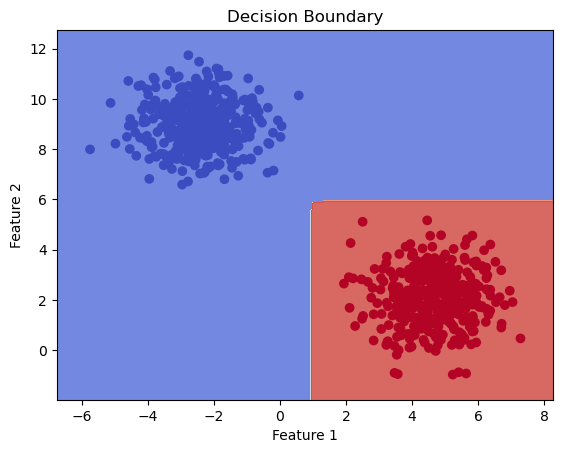

GradientBoostingClassifier: Accuracy = 1.000


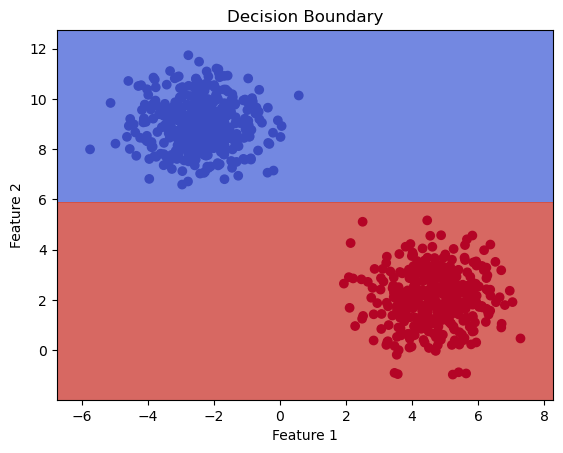

AdaBoostClassifier: Accuracy = 1.000


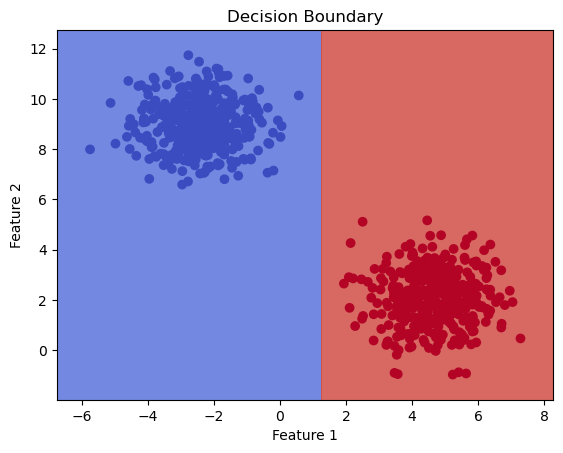

In [10]:
models=[lr_pipeline, dt_pipeline, bagging_pipeline, gb_pipeline, ada_pipeline]
evaluate_models(models, X_linear_train, X_linear_test, y_linear_train, y_linear_test)

LogisticRegression: Accuracy = 0.982


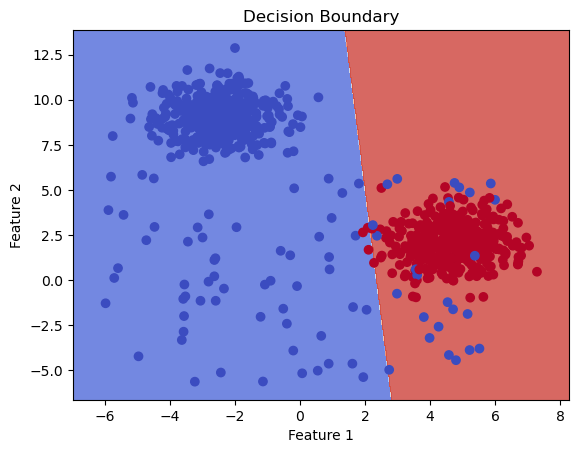

DecisionTreeClassifier: Accuracy = 0.977


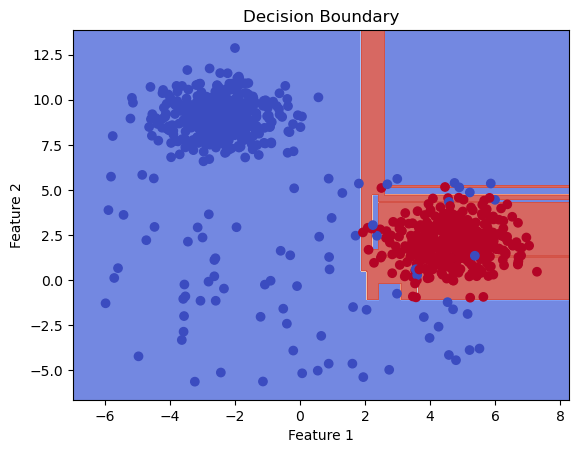

BaggingClassifier: Accuracy = 0.977


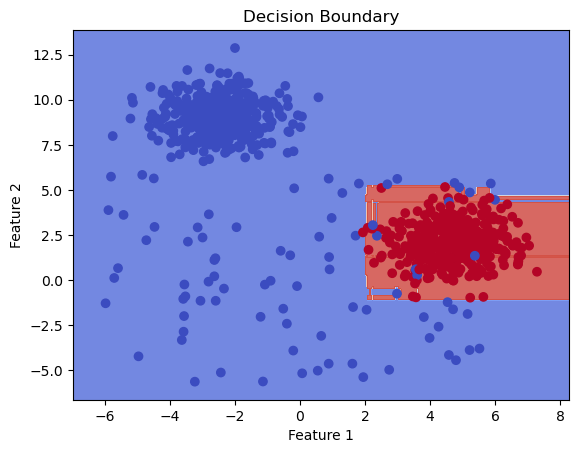

GradientBoostingClassifier: Accuracy = 0.982


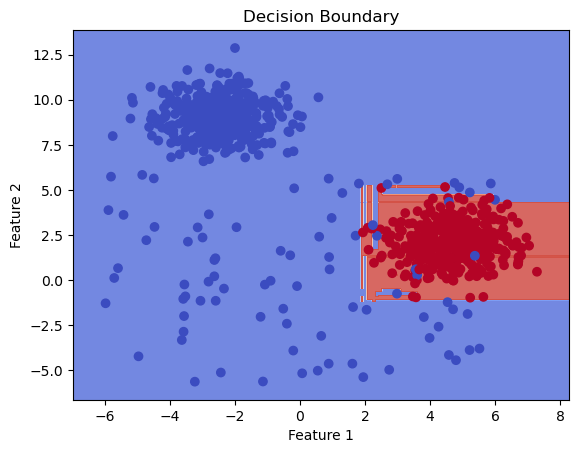

AdaBoostClassifier: Accuracy = 0.977


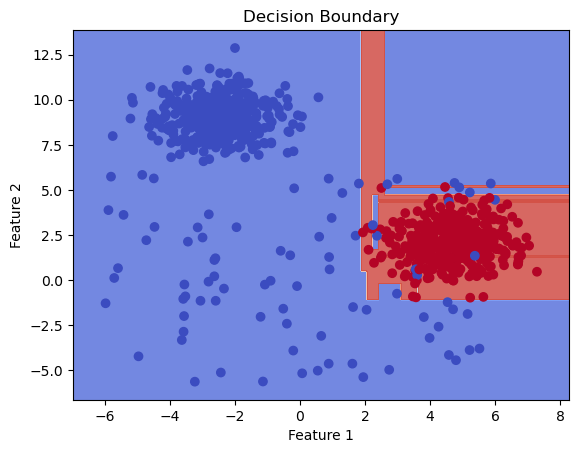

In [11]:
evaluate_models(models,X_linear_outliers_train, X_linear_outliers_test, y_linear_outliers_train, y_linear_outliers_test)

LogisticRegression: Accuracy = 0.500


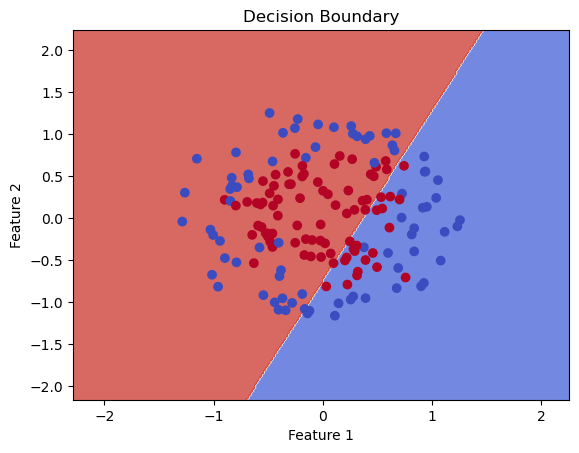

DecisionTreeClassifier: Accuracy = 0.800


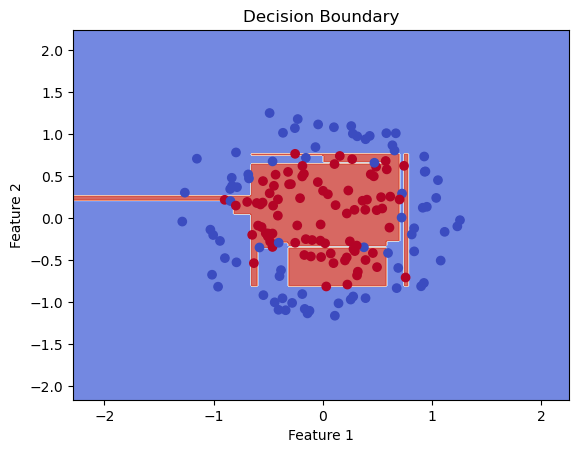

BaggingClassifier: Accuracy = 0.750


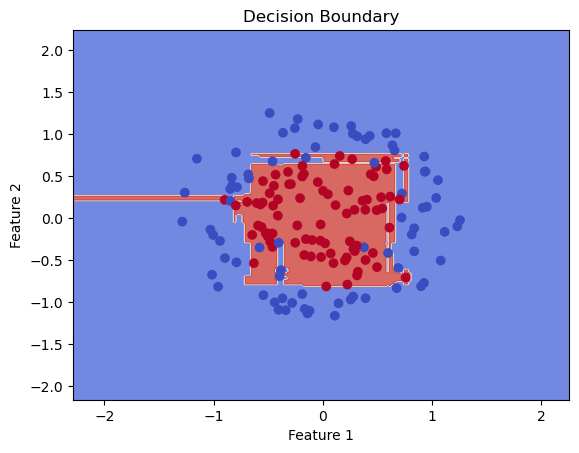

GradientBoostingClassifier: Accuracy = 0.775


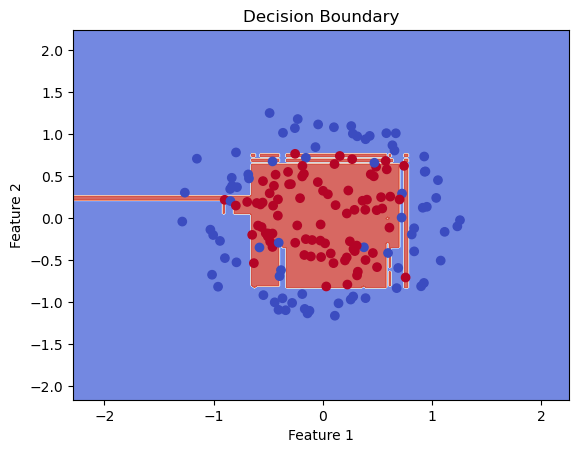

AdaBoostClassifier: Accuracy = 0.800


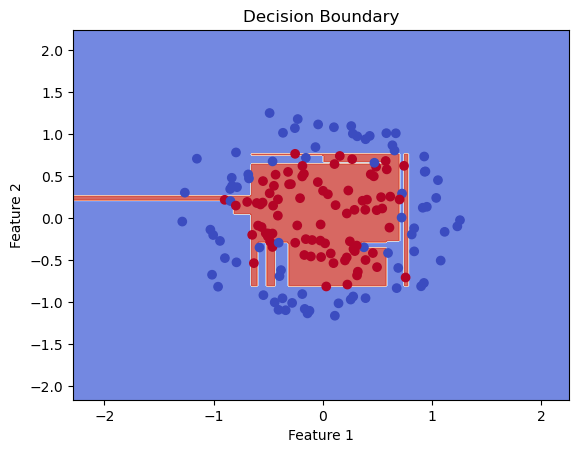

In [12]:
evaluate_models(models,X_nonlinear_train, X_nonlinear_test, y_nonlinear_train, y_nonlinear_test)

## Question 7: Create a stacking model using voting classifier

In [13]:
voting_pipeline = Pipeline([('clf', VotingClassifier(estimators=[('lr', lr_pipeline), ('dt', dt_pipeline), ('bg', bagging_pipeline), ('gb', gb_pipeline), ('ada', ada_pipeline)]))])
models=[voting_pipeline,lr_pipeline, dt_pipeline, bagging_pipeline, gb_pipeline, ada_pipeline]

VotingClassifier: Accuracy = 1.000


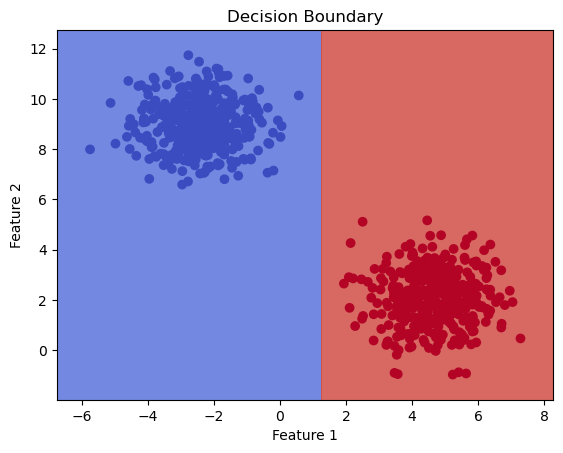

LogisticRegression: Accuracy = 1.000


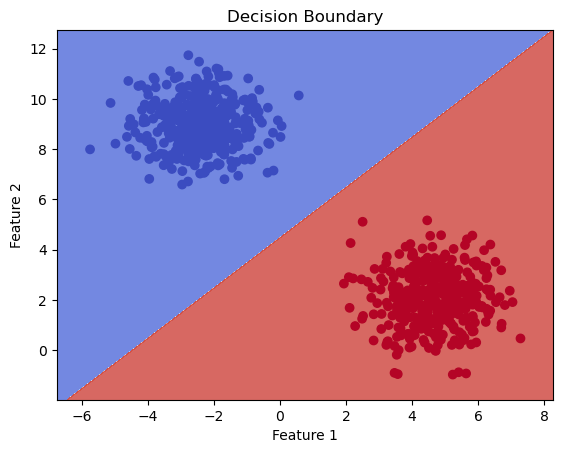

DecisionTreeClassifier: Accuracy = 1.000


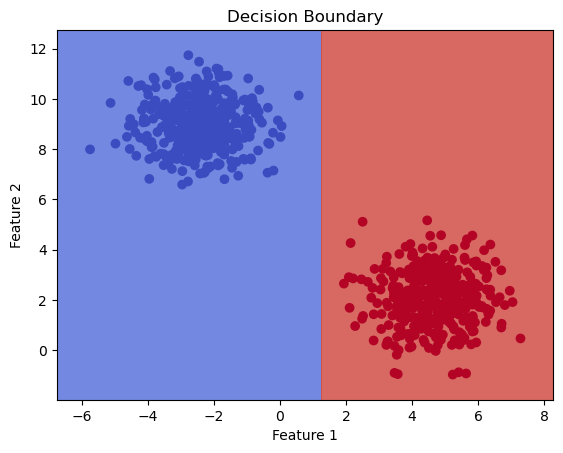

BaggingClassifier: Accuracy = 1.000


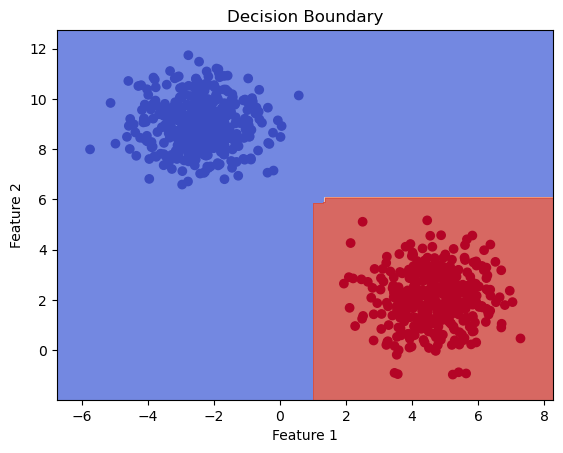

GradientBoostingClassifier: Accuracy = 1.000


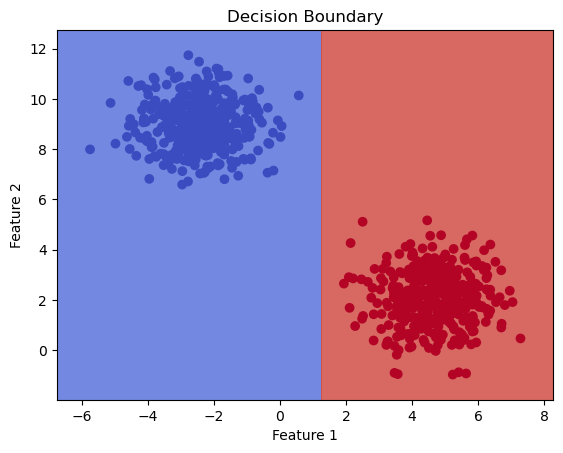

AdaBoostClassifier: Accuracy = 1.000


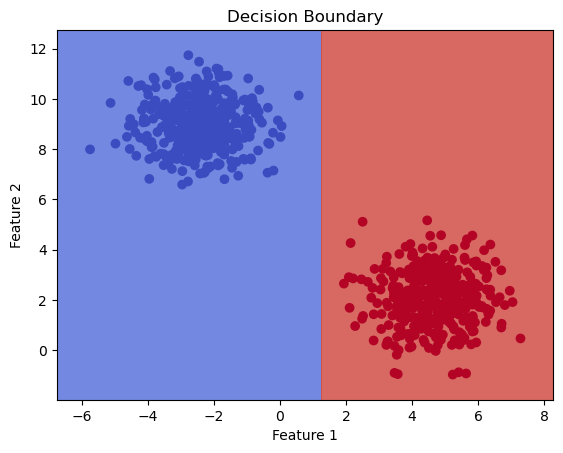

In [14]:
evaluate_models(models, X_linear_train, X_linear_test, y_linear_train, y_linear_test)

VotingClassifier: Accuracy = 0.982


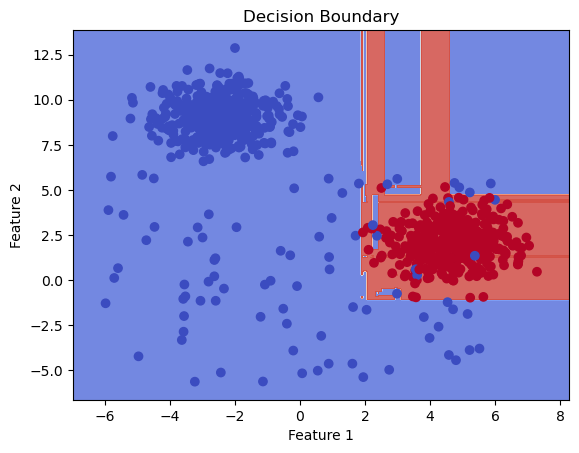

LogisticRegression: Accuracy = 0.982


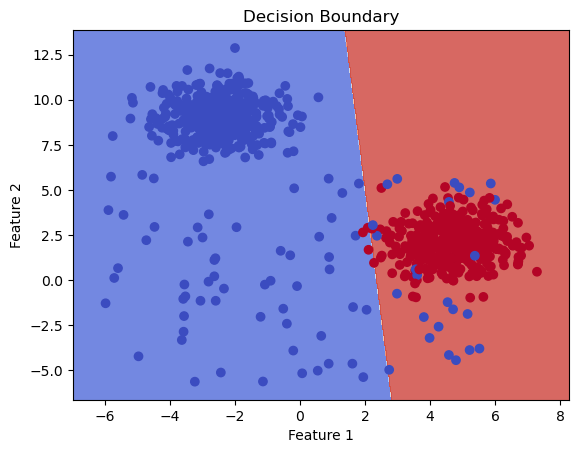

DecisionTreeClassifier: Accuracy = 0.977


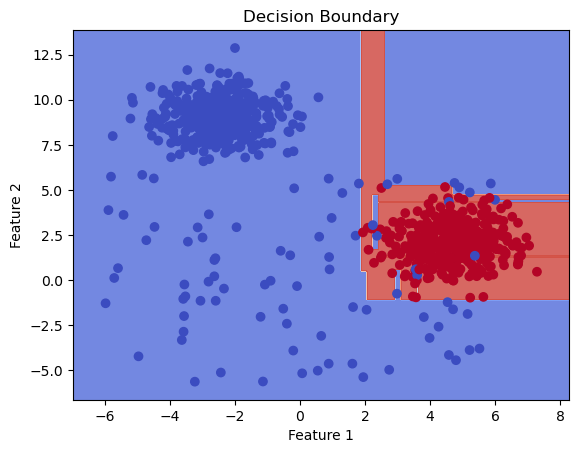

BaggingClassifier: Accuracy = 0.977


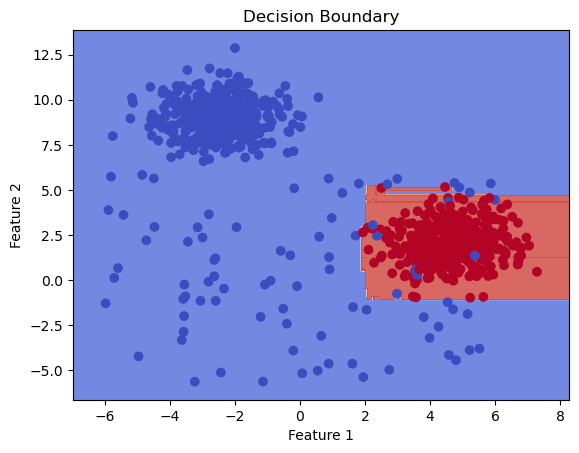

GradientBoostingClassifier: Accuracy = 0.982


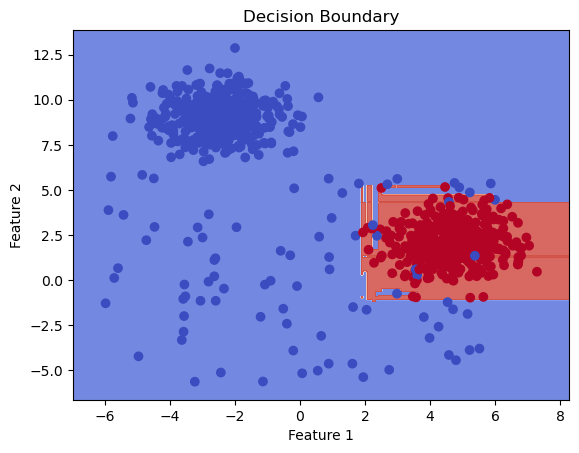

AdaBoostClassifier: Accuracy = 0.977


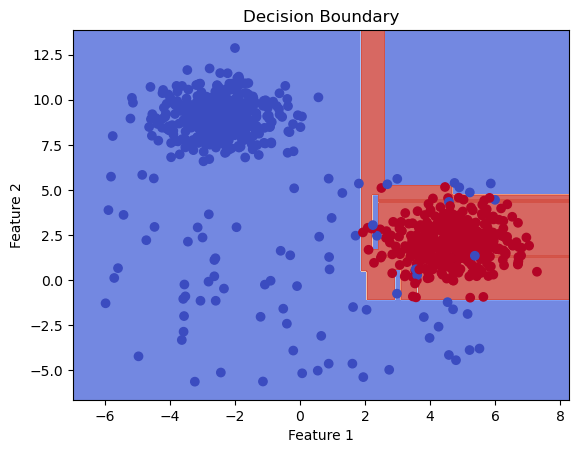

In [15]:
evaluate_models(models,X_linear_outliers_train, X_linear_outliers_test, y_linear_outliers_train, y_linear_outliers_test)

VotingClassifier: Accuracy = 0.825


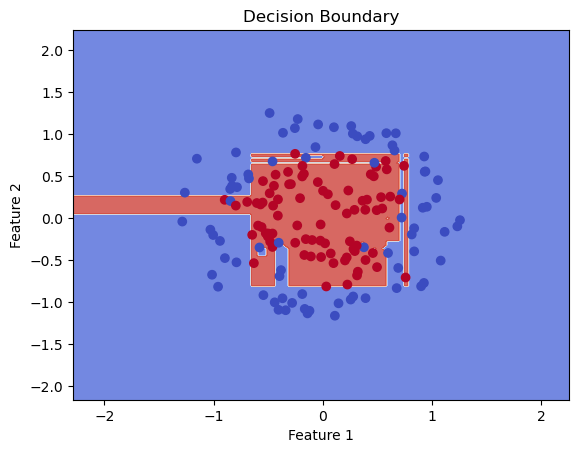

LogisticRegression: Accuracy = 0.500


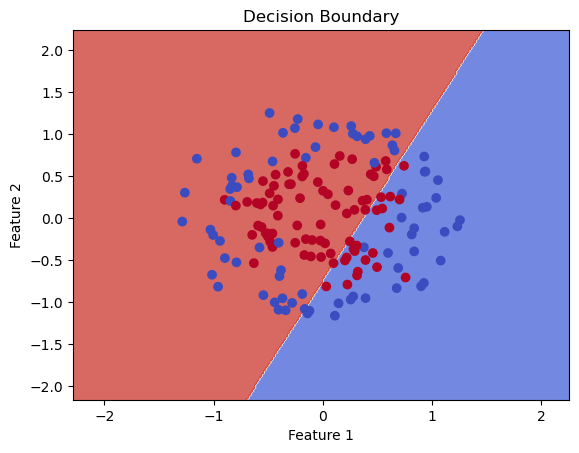

DecisionTreeClassifier: Accuracy = 0.800


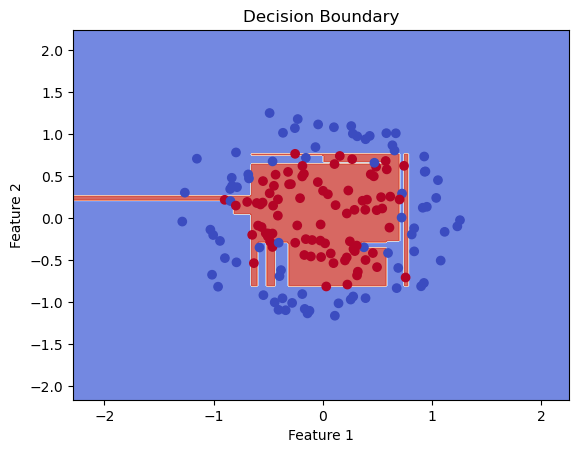

BaggingClassifier: Accuracy = 0.825


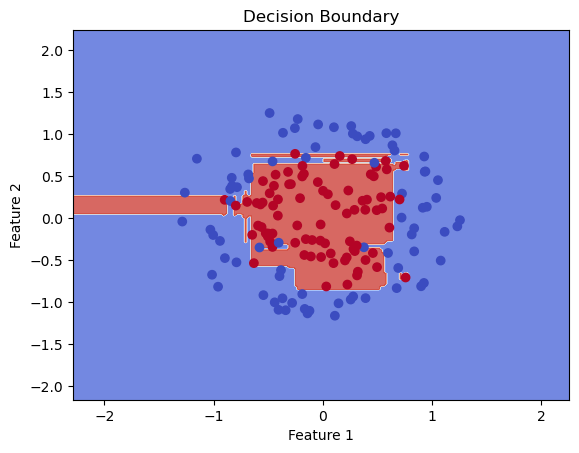

GradientBoostingClassifier: Accuracy = 0.775


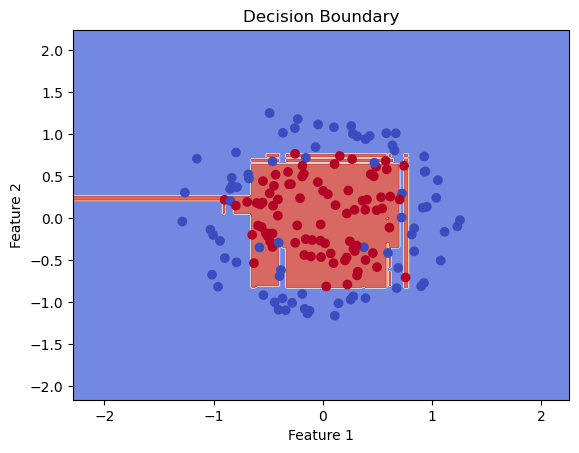

AdaBoostClassifier: Accuracy = 0.825


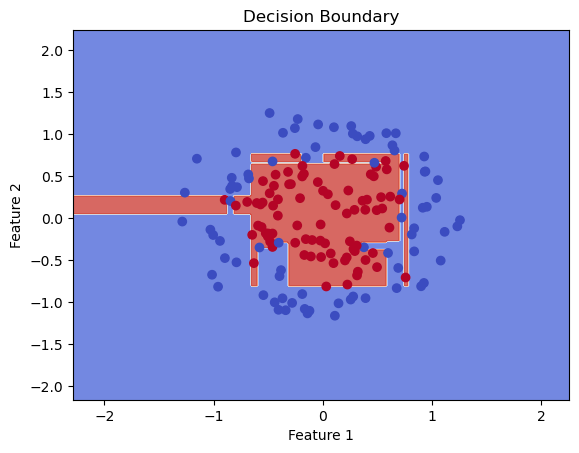

In [16]:
evaluate_models(models,X_nonlinear_train, X_nonlinear_test, y_nonlinear_train, y_nonlinear_test)

## Question 8: Create a stacking model from the above base models using logistic regression as the final classifier


In [17]:
sc_pipeline = Pipeline([('clf',StackingClassifier(estimators=[('lr', lr_pipeline), ('dt', dt_pipeline), ('bg', bagging_pipeline), ('gb', gb_pipeline), ('ada', ada_pipeline)], final_estimator=LogisticRegression()))])
models=[sc_pipeline, voting_pipeline,lr_pipeline, dt_pipeline, bagging_pipeline, gb_pipeline, ada_pipeline]

StackingClassifier: Accuracy = 1.000


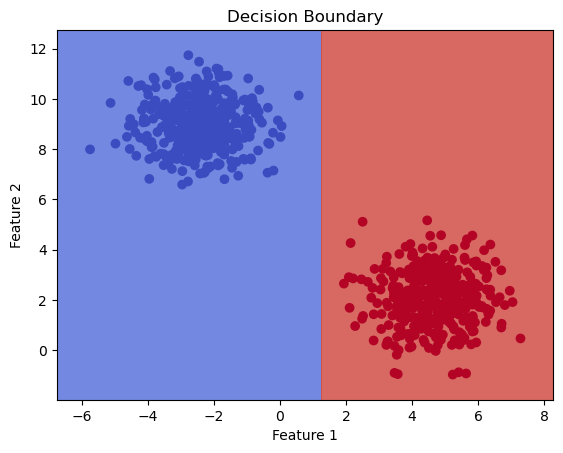

VotingClassifier: Accuracy = 1.000


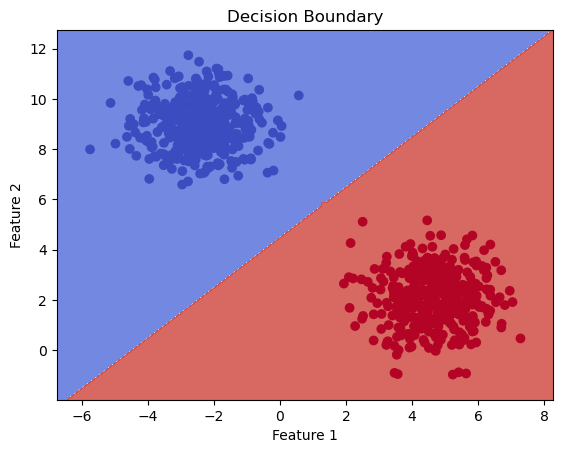

LogisticRegression: Accuracy = 1.000


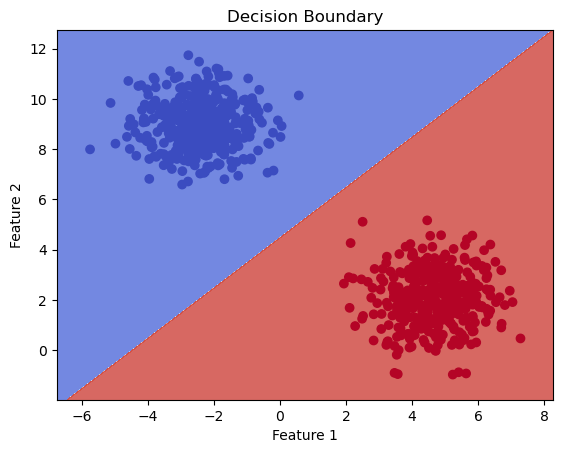

DecisionTreeClassifier: Accuracy = 1.000


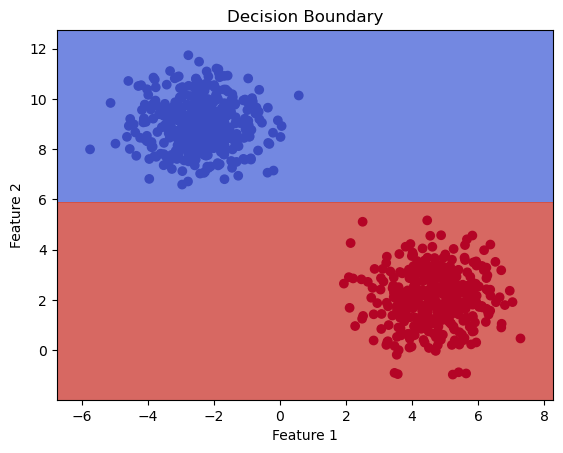

BaggingClassifier: Accuracy = 1.000


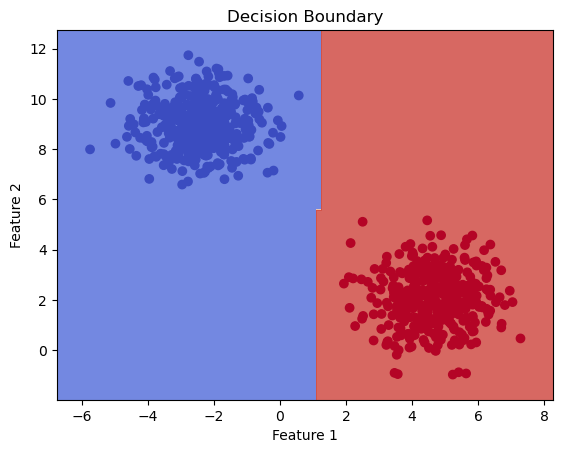

GradientBoostingClassifier: Accuracy = 1.000


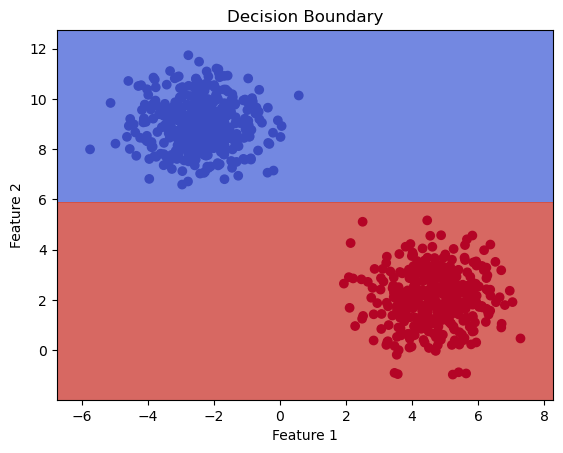

AdaBoostClassifier: Accuracy = 1.000


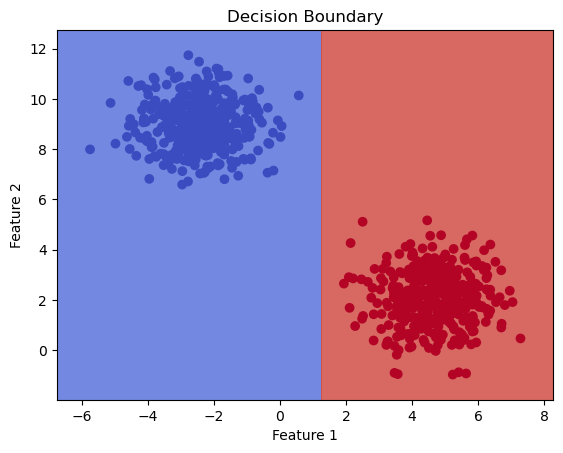

In [18]:
evaluate_models(models, X_linear_train, X_linear_test, y_linear_train, y_linear_test)

StackingClassifier: Accuracy = 0.982


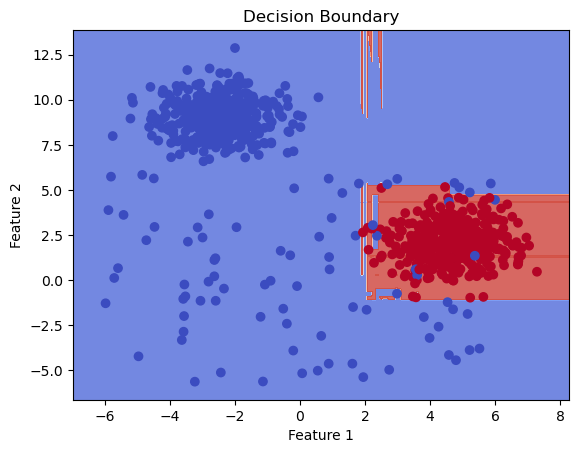

VotingClassifier: Accuracy = 0.982


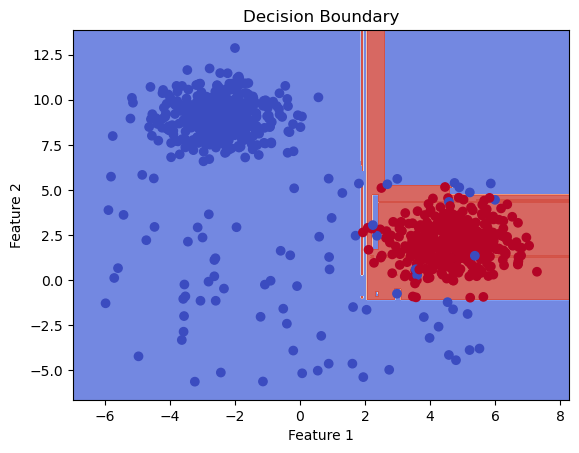

LogisticRegression: Accuracy = 0.982


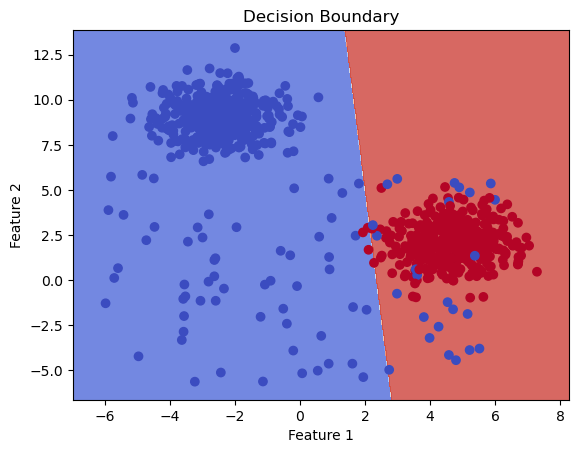

DecisionTreeClassifier: Accuracy = 0.977


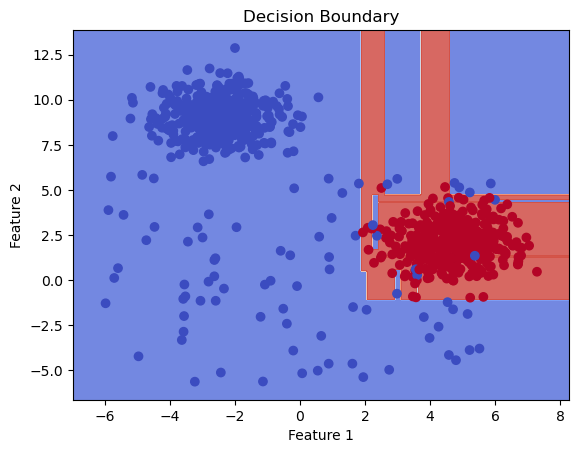

BaggingClassifier: Accuracy = 0.977


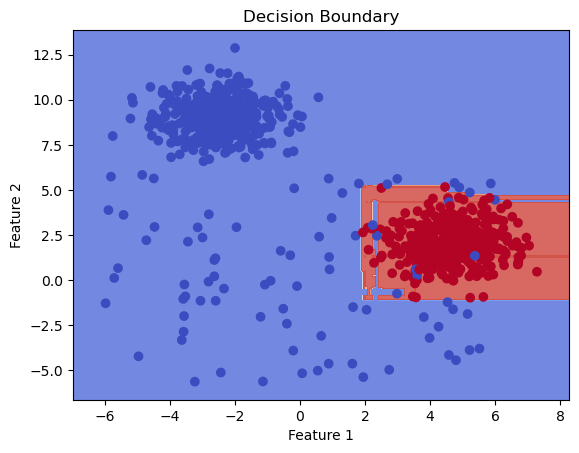

GradientBoostingClassifier: Accuracy = 0.982


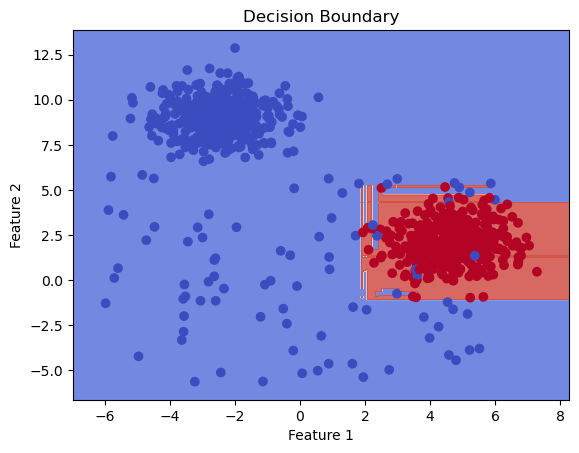

AdaBoostClassifier: Accuracy = 0.982


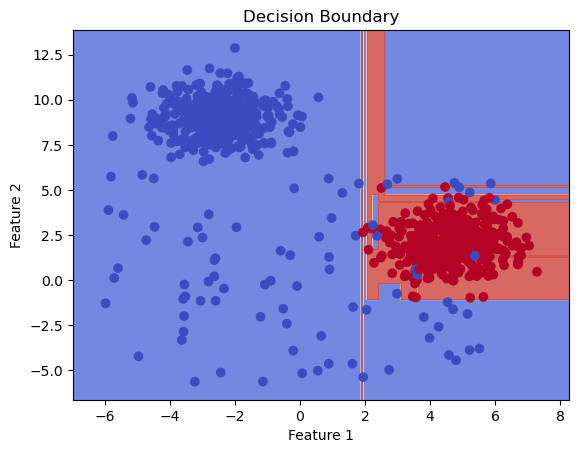

In [19]:
evaluate_models(models,X_linear_outliers_train, X_linear_outliers_test, y_linear_outliers_train, y_linear_outliers_test)

StackingClassifier: Accuracy = 0.775


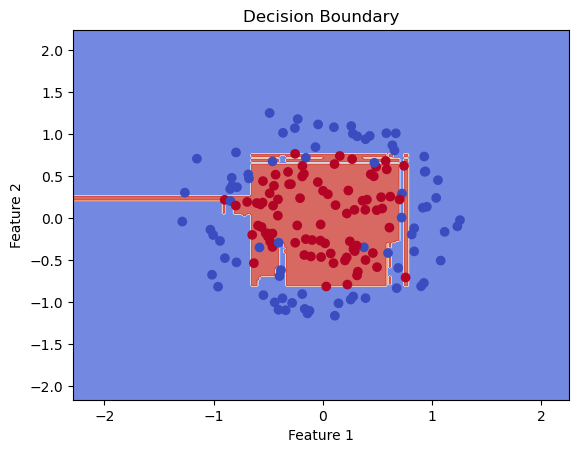

VotingClassifier: Accuracy = 0.800


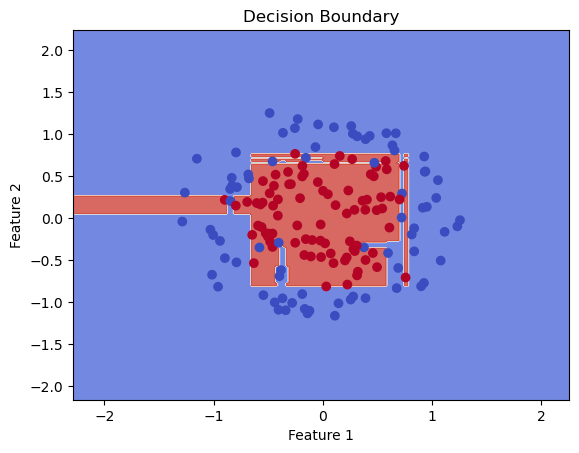

LogisticRegression: Accuracy = 0.500


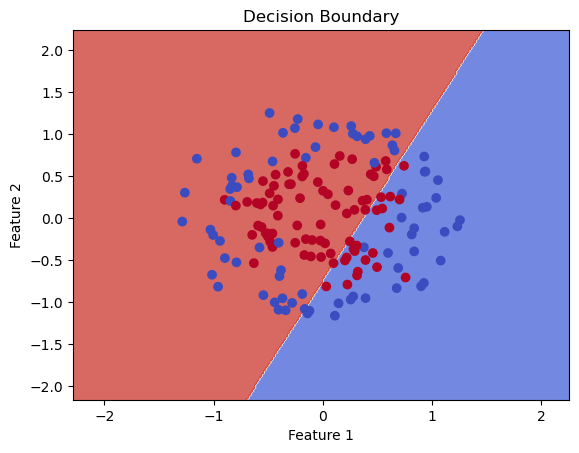

DecisionTreeClassifier: Accuracy = 0.800


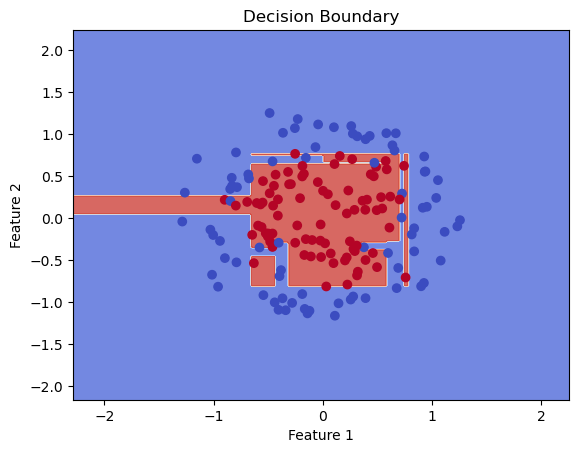

BaggingClassifier: Accuracy = 0.800


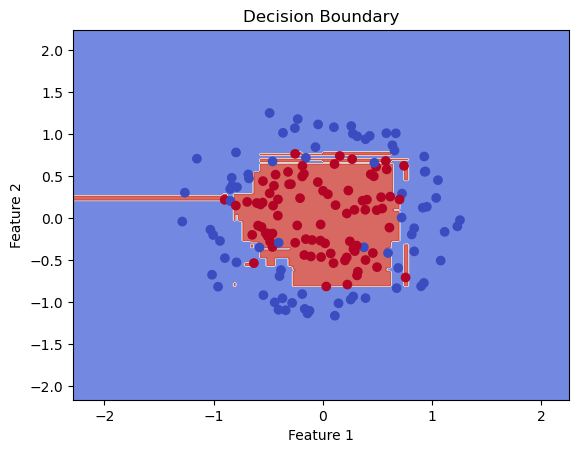

GradientBoostingClassifier: Accuracy = 0.775


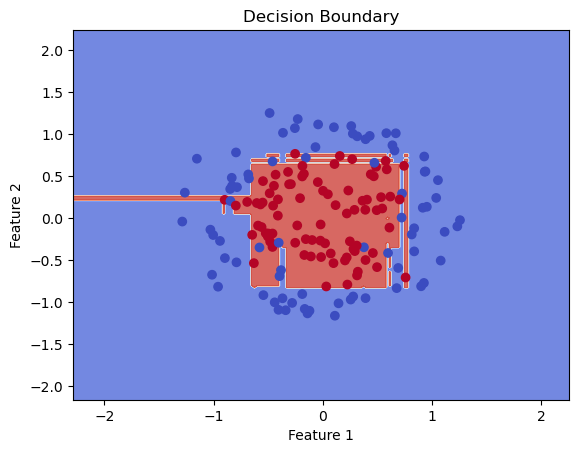

AdaBoostClassifier: Accuracy = 0.800


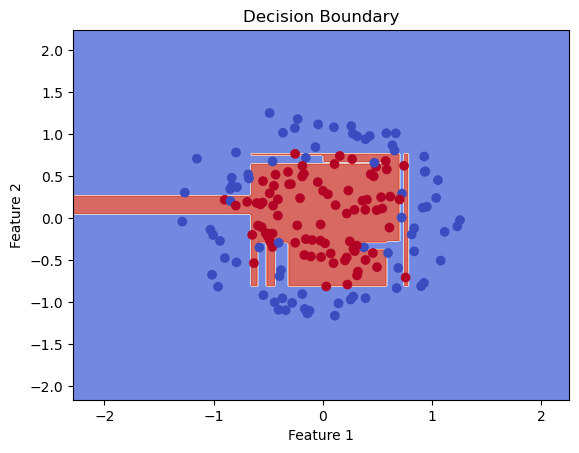

In [20]:
evaluate_models(models,X_nonlinear_train, X_nonlinear_test, y_nonlinear_train, y_nonlinear_test)